In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

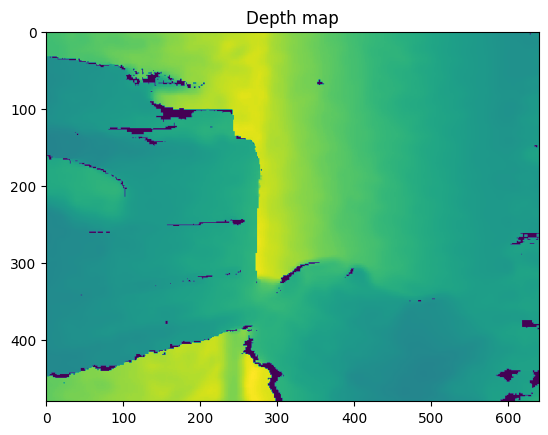

In [2]:
im1 = Image.open('../data/void_1500/data/copyroom1/ground_truth/1552024017.5448.png')
plt.imshow(im1) 
plt.title("Depth map") 
plt.show() 

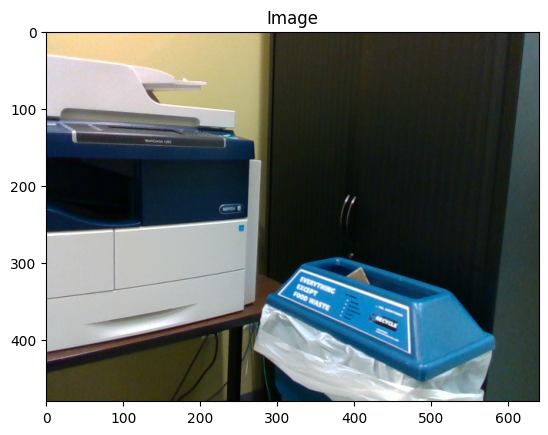

In [4]:
im2 = Image.open('../data/void_1500/data/copyroom1/image/1552024017.5448.png')
plt.imshow(im2) 
plt.title("Image") 
plt.show() 

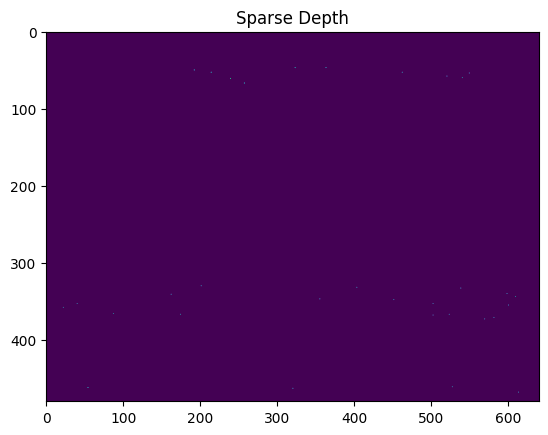

In [21]:
im3 = Image.open('../data/void_1500/data/copyroom1/sparse_depth/1552024017.5448.png')
plt.imshow(im3) 
plt.title("Sparse Depth") 
plt.show() 


In [1]:
from ultralytics import YOLO


/media/home/ryjin/depthclip/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model = YOLO("../yolov8m-world.pt")

In [16]:
result = model.predict(
    source="../data/void_1500/data/classroom0/image/1552098065.0606.png"
)


image 1/1 /media/home/ryjin/depthclip/RangeCLIP/setup/../data/void_1500/data/classroom0/image/1552098065.0606.png: 480x640 4 chairs, 6.8ms
Speed: 2.5ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


In [17]:
img = result[0].plot()  # This plots the detections on the image

In [18]:
import matplotlib.pyplot as plt

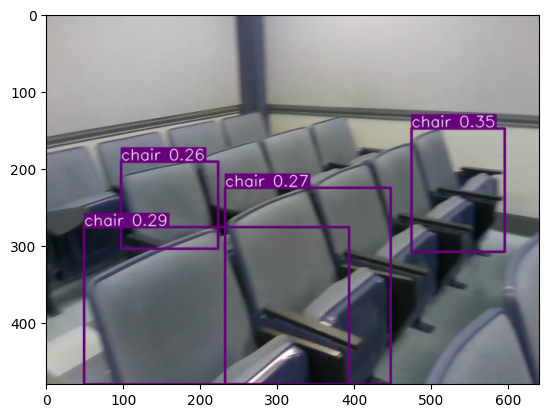

In [19]:
plt.imshow(img)
plt.show()

In [1]:
import os
import numpy as np
from PIL import Image
import json

def read_file(filepath):
    """
    Returns string content from file

    Args:
      path : str
        path to file where data will be stored
    """
    data = ""
    with open(filepath, "r") as f:
        data = f.read()

    return data

def parse_json(json_string, ignore_keys=[]):
    data = json.loads(json_string)
    for ignore_key in ignore_keys:
        data.pop(ignore_key, None)
  
    return data


def read_paths(filepath, prefix=None):
    """
    Reads a list of paths from a file

    Args:
      path : str
        path to file where data will be stored
    """
    path_list = []
    with open(filepath) as f:
        while True:
            path = f.readline().rstrip("\n")
            # If there was nothing to read
            if path == "":
                break

            if prefix:
                path = prefix + path

            path_list.append(path)

    return path_list


def load_depth_with_validity_map(path):
    """
    Loads a depth map and validity map from a 16-bit PNG file

    Args:
      path : str
        path to 16-bit PNG file

    Returns:
      numpy : depth map
      numpy : binary validity map for available depth measurement locations
    """
    # Loads depth map from 16-bit PNG file
    z = np.array(Image.open(path), dtype=np.float32)
    # Assert 16-bit (not 8-bit) depth map
    z = z / 256.0
    z[z <= 0] = 0.0
    v = z.astype(np.float32)
    v[z > 0] = 1.0
    return z, v


def load_depth(path):
    """
    Loads a depth map from a 16-bit PNG file

    Args:
      path : str
        path to 16-bit PNG file

    Returns:
      numpy : depth map
    """
    # Loads depth map from 16-bit PNG file
    z = np.array(Image.open(path), dtype=np.float32)
    # Assert 16-bit (not 8-bit) depth map
    z = z / 256.0
    z[z <= 0] = 0.0
    return z


def save_depth(z, path):
    """
    Saves a depth map to a 16-bit PNG file

    Args:
      z : numpy
        depth map
      path : str
        path to store depth map
    """
    z = np.uint32(z * 256.0)
    z = Image.fromarray(z, mode="I")
    z.save(path)


def load_validity_map(path):
    """
    Loads a validity map from a 16-bit PNG file

    Args:
      path : str
        path to 16-bit PNG file

    Returns:
      numpy : binary validity map for available depth measurement locations
    """
    # Loads depth map from 16-bit PNG file
    v = np.array(Image.open(path), dtype=np.float32)
    assert np.all(np.unique(v) == [0, 256])
    v[v > 0] = 1
    return v


def save_validity_map(v, path):
    """
    Saves a validity map to a 16-bit PNG file

    Args:
      v : numpy
        validity map
      path : str
        path to store validity map
    """
    v[v <= 0] = 0.0
    v[v > 0] = 1.0
    v = np.uint32(v * 256.0)
    v = Image.fromarray(v, mode="I")
    v.save(path)


def write_paths(filepath, paths):
    """
    Stores line delimited paths into file

    Arg(s):
        filepath : str
            path to file to save paths
        paths : list[str]
            paths to write into file
    """

    with open(filepath, "w") as o:
        for idx in range(len(paths)):
            o.write(paths[idx] + "\n")

def get_categories_from_vild_json_file(filepath):
    json_data = read_file(filepath)
    categories_dict = parse_json(json_data, ignore_keys=['annotations', 'info', 'licenses', 'images'])
    categories = [category['name'] for category in categories_dict['categories']]
    return categories

In [2]:
train_image_path = '../training/void_1500/void_1500_train_image.txt'
train_depth_path = '../training/void_1500/void_1500_train_ground_truth.txt'

images = read_paths(train_image_path, prefix='../')
depths = read_paths(train_depth_path, prefix='../')

def get_image_name(path):
    return path.split('/')[-1]

import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image




from ultralytics import YOLO
model = YOLO("../yolov8m-world.pt")
yolo_categories = model.names
yolo_categories

/media/home/ryjin/depthclip/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [6]:
categories=get_categories_from_vild_json_file('../data/lvis/lvis_val_100.json')
len(categories)

1230

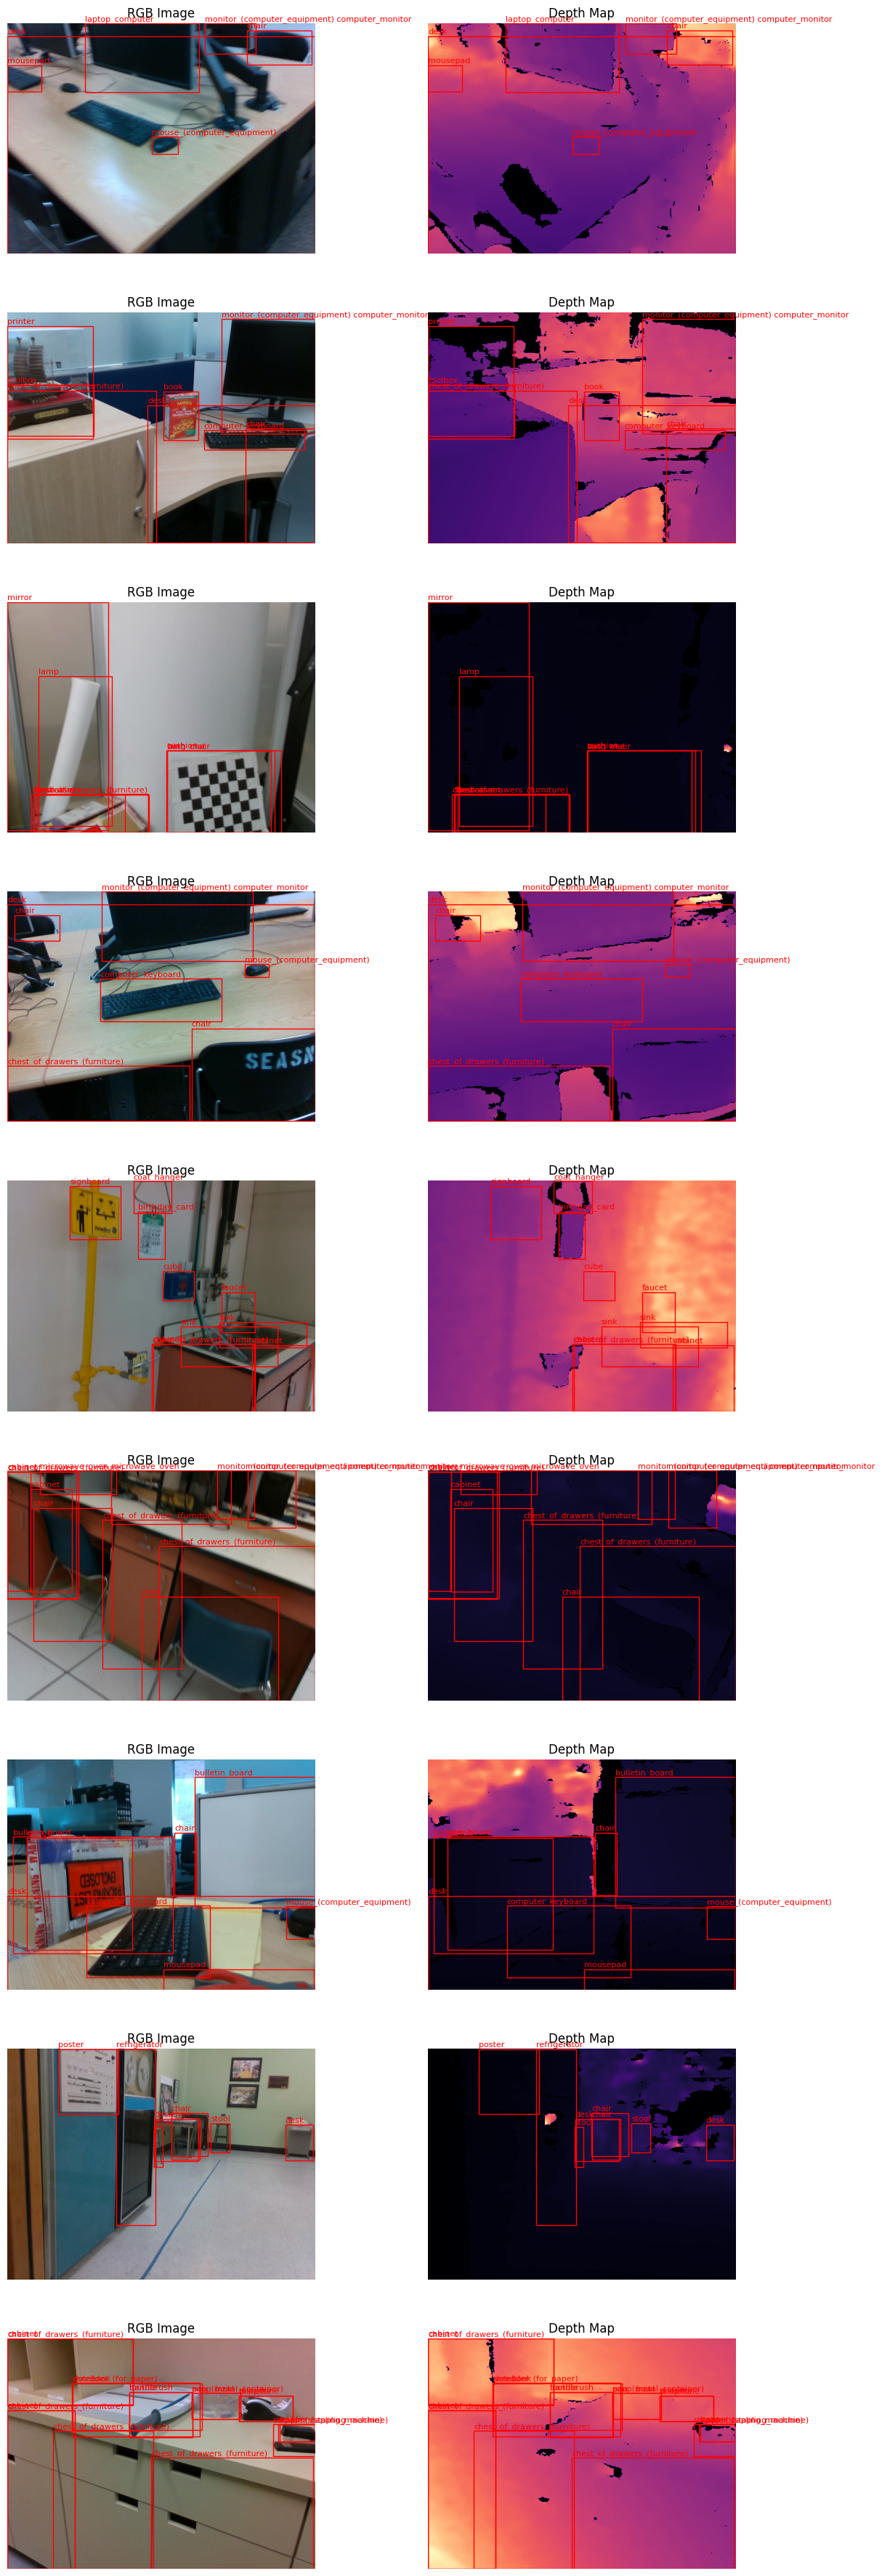

In [8]:


# Configuration
use_yolo_world = True  # Toggle between YOLO-World and YOLOv8

# Function to get category names based on model type
def get_category_name(class_id):
    if use_yolo_world:
        return categories[class_id]  # YOLO-World categories
    else:
        return yolo_categories[class_id]  # YOLOv8 categories

# Function to draw bounding boxes on an image
def draw_bboxes(ax, img, detections, title=""):
    img_array = np.array(img)
    img_width, img_height = img.size
    if 'depth' in title.lower():
        img_array = (img_array - img_array.min()) / (img_array.max() - img_array.min())  # Normalize
        
    ax.imshow(img_array, cmap="magma" if "depth" in title.lower() else None)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

    for det in detections:
        det = [float(s) for s in det]
        class_id, x, y, w, h = det  # Unpack detection values
        class_id = int(class_id)

        # Convert normalized values to pixel coordinates
        x_min = (x - w / 2) * img_width
        y_min = (y - h / 2) * img_height
        box_width = w * img_width
        box_height = h * img_height

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), box_width, box_height, 
                                 linewidth=1, edgecolor='red', facecolor='none')

        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, f'{get_category_name(class_id)}', color='red', 
                fontsize=8)


    

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(12, 36)) 
plt.subplots_adjust(wspace=0, hspace=0)
label_set = 'yolo_world_detection_labels' if use_yolo_world else 'yolo_detection_labels'
base_path = '/media/home/ryjin/depthclip/RangeCLIP/training/void_1500/' + label_set + '/labels/'

sampled_images = []
while len(sampled_images) < 9:
    i = random.randint(0, len(images) - 1)
    
    image_path = images[i]  # Path to image file
    image_name=get_image_name(image_path)
    label_path = base_path + image_name.replace('png', 'txt')
    
    if os.path.exists(label_path):
        sampled_images.append(i)

for idx, i in enumerate(sampled_images):
    image_path = images[i]  # Path to image file
    depth_path = depths[i]  # Path to depth file
    image_name = get_image_name(image_path)
    label_path = base_path + image_name.replace('png', 'txt')
    
    if not os.path.exists(label_path):
        continue

    detection_data = read_file(label_path).splitlines()
    detection_data = [d.split(' ') for d in detection_data]

    # Load images
    rgb_img = Image.open(image_path)
    depth_img = Image.open(depth_path)
    

    # Plot RGB image with detections
    draw_bboxes(axes[idx, 0], rgb_img, detection_data, title="RGB Image")
    draw_bboxes(axes[idx, 1], depth_img, detection_data, title="Depth Map")

plt.tight_layout()
plt.show()



In [2]:
!pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 33.0 MB/s eta 0:00:00


Keys in the h5 file: ['depth', 'rgb']


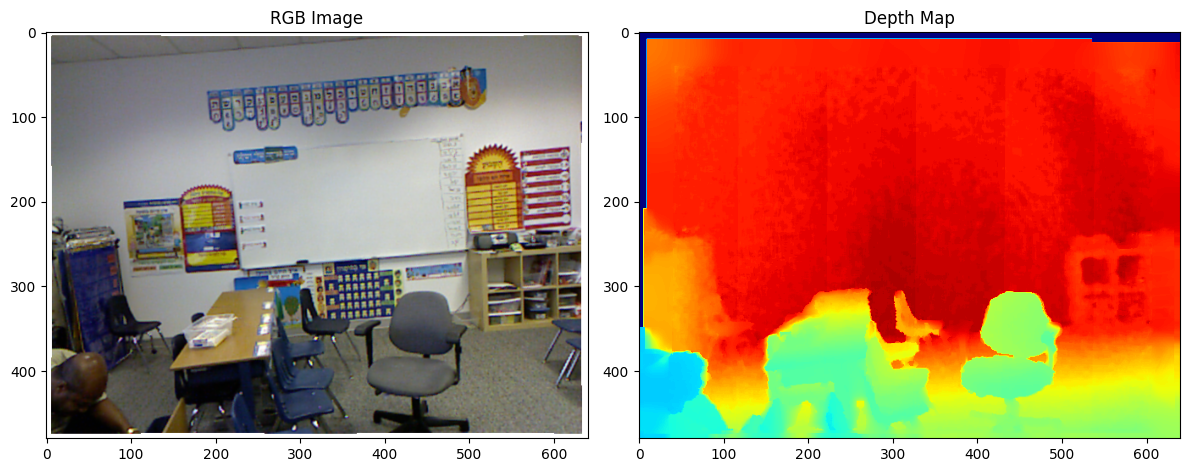

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Path to your data directory
data_dir = Path('/media/common/datasets/nyu_depth_v2/train/classroom_0005')

# Load a sample file
sample_file = data_dir / '00001.h5'
with h5py.File(sample_file, 'r') as f:
    # Print the keys to see what's available in the file
    print(f"Keys in the h5 file: {list(f.keys())}")
    
    # Typically, NYU Depth v2 h5 files contain 'rgb' and 'depth' data
    rgb = np.array(f['rgb'])
    depth = np.array(f['depth'])
    
    # The RGB image might need to be transposed for visualization
    if rgb.shape[0] == 3:  # If channels are first dimension
        rgb = np.transpose(rgb, (1, 2, 0))
    
    # Visualize the RGB and depth images
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('RGB Image')
    plt.imshow(rgb)
    
    plt.subplot(1, 2, 2)
    plt.title('Depth Map')
    plt.imshow(depth, cmap='jet')  # 'jet' colormap works well for depth
    
    plt.tight_layout()
    plt.show()

In [4]:
def visualize_samples(data_dir, num_samples=5):
    h5_files = sorted(list(Path(data_dir).glob('*.h5')))[:num_samples]
    
    for i, file_path in enumerate(h5_files):
        with h5py.File(file_path, 'r') as f:
            rgb = np.array(f['rgb'])
            depth = np.array(f['depth'])
            
            # Handle RGB dimensions if needed
            if rgb.shape[0] == 3:
                rgb = np.transpose(rgb, (1, 2, 0))
            
            plt.figure(figsize=(12, 5))
            plt.suptitle(f'Sample {file_path.stem}')
            
            plt.subplot(1, 2, 1)
            plt.title('RGB Image')
            plt.imshow(rgb)
            
            plt.subplot(1, 2, 2)
            plt.title('Depth Map')
            plt.imshow(depth, cmap='jet')
            
            plt.tight_layout()
            plt.show()

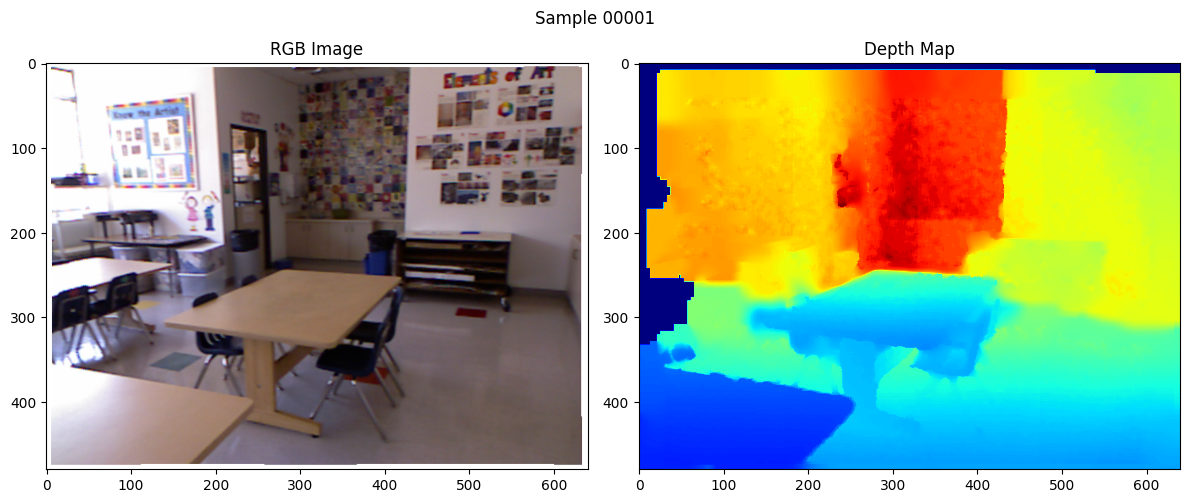

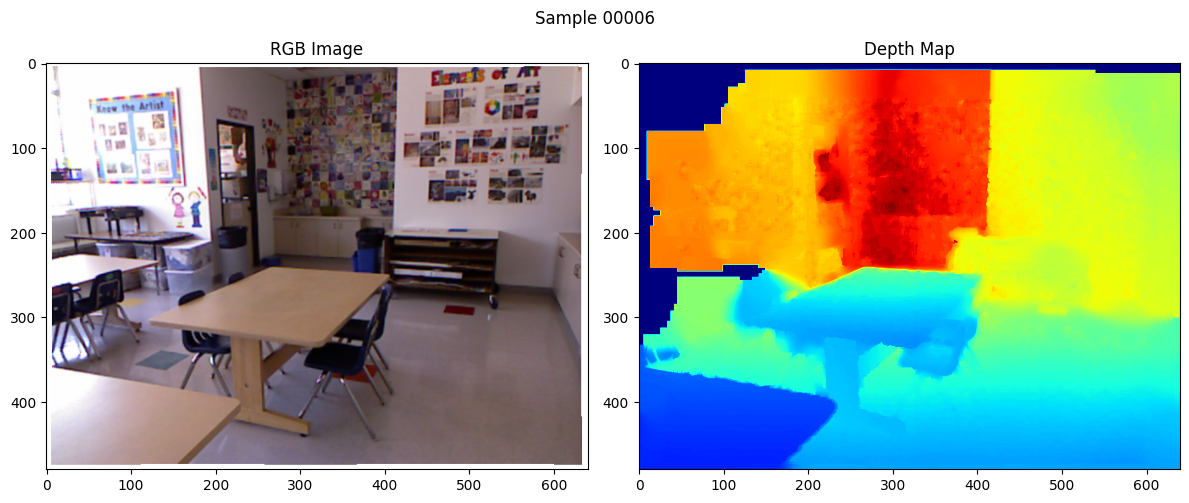

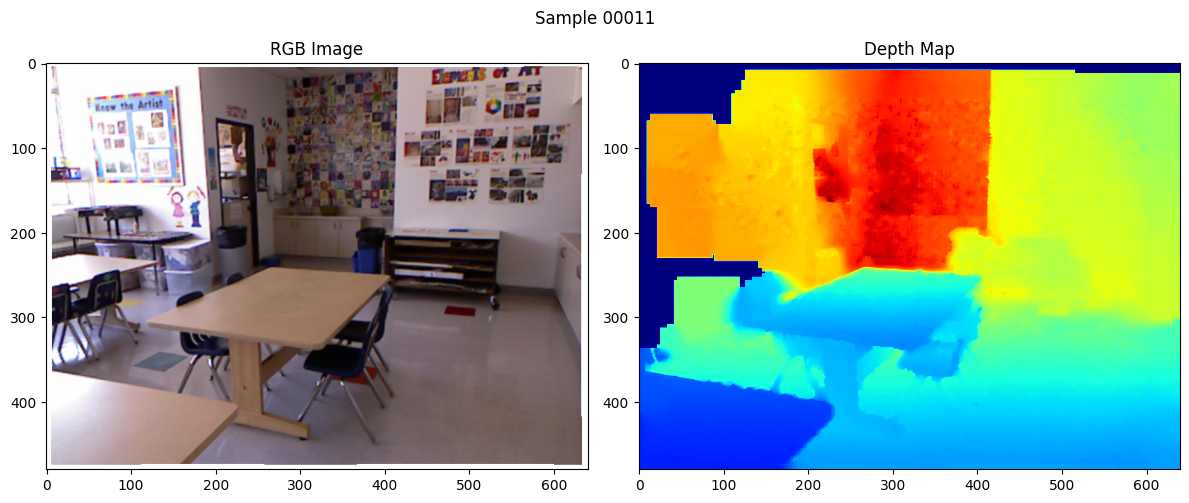

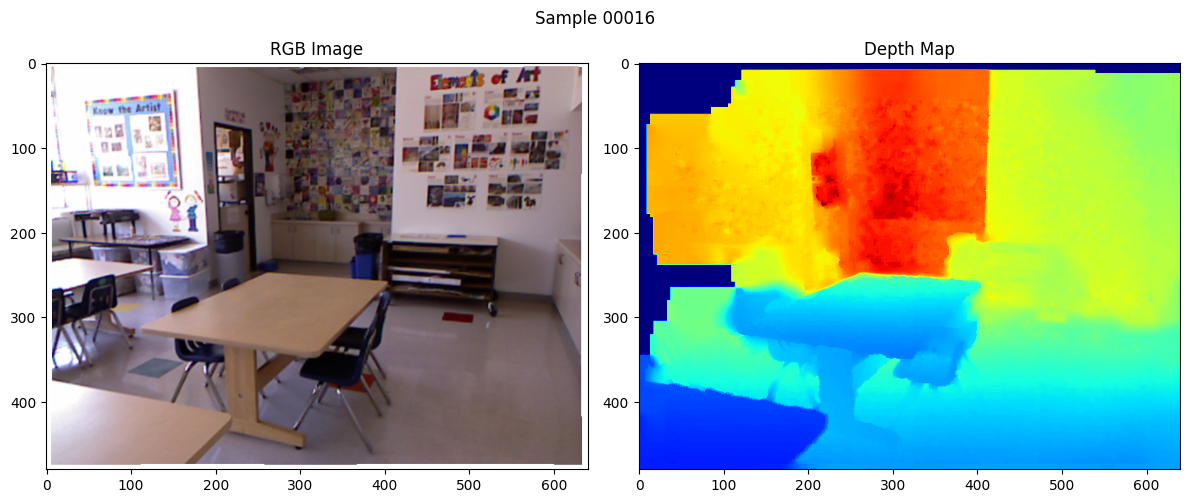

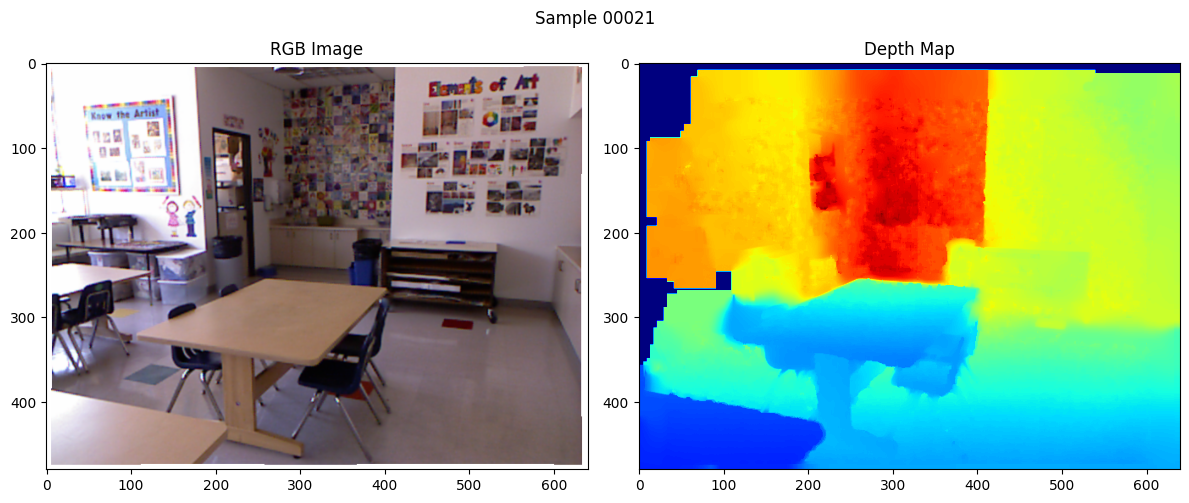

In [10]:
data_dir = Path('/media/common/datasets/nyu_depth_v2/train/classroom_0006')
visualize_samples(data_dir)

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to one of your h5 files
sample_file = "/media/common/datasets/nyu_depth_v2/train/bathroom_0049/00001.h5"

# Open the file and print its structure
def explore_h5_file(file_path):
    with h5py.File(file_path, 'r') as f:
        print("Keys in the H5 file:")
        for key in f.keys():
            print(f"- {key}")
            
            # If the item is a dataset, print its shape and dtype
            if isinstance(f[key], h5py.Dataset):
                print(f"  Shape: {f[key].shape}, Type: {f[key].dtype}")
            
            # If it's a group, print its keys
            elif isinstance(f[key], h5py.Group):
                print(f"  Sub-keys: {list(f[key].keys())}")
        
        # If you want to see sample data
        if 'rgb' in f:
            print("\nSample RGB data:")
            rgb = f['rgb'][:]
            print(f"RGB shape: {rgb.shape}")
            
        if 'depth' in f:
            print("\nSample depth data:")
            depth = f['depth'][:]
            print(f"Depth shape: {depth.shape}")
            
        # Check for segmentation or labels
        for possible_key in ['segmentation', 'labels', 'instances', 'semantic', 'class']:
            if possible_key in f:
                print(f"\nFound {possible_key} data:")
                seg_data = f[possible_key][:]
                print(f"{possible_key} shape: {seg_data.shape}")
                if possible_key in ['labels', 'class']:
                    unique_values = np.unique(seg_data)
                    print(f"Unique {possible_key} values: {unique_values}")

# Run the function
explore_h5_file(sample_file)

Keys in the H5 file:
- depth
  Shape: (480, 640), Type: float32
- rgb
  Shape: (3, 480, 640), Type: uint8

Sample RGB data:
RGB shape: (3, 480, 640)

Sample depth data:
Depth shape: (480, 640)


In [1]:
import h5py
import numpy as np

In [ ]:
import h5py
import numpy as np

file_path = "/media/home/ryjin/depthclip/RangeCLIP/data/nyu_depth_v2/nyu_depth_v2_labeled/nyu_depth_v2_labeled.mat"

with h5py.File(file_path, "r") as data:
    images = np.array(data["images"])  # (3, H, W, N)
    depths = np.array(data["depths"])  # (H, W, N)
    labels = np.array(data["labels"])  # (H, W, N)

    # Extract names and decode
    namesRef = data['names'][0]
    names = [data[ref][()].tobytes().decode("utf-16").strip("\x00") for ref in namesRef]

    # Convert namesToIds to NumPy array
    namesToIds = np.array(data["namesToIds"])

    # Dereference scene names and decode properly
    scene_refs = data["scenes"][0]  # Extract object references
    scenes = [data[ref][()].tobytes().decode("utf-16").strip("\x00") for ref in scene_refs]

# Check the output
print("Scenes:", scenes[:5])  # Print first 5 scene names
print("First few names:", names[:5])

Scenes: ['kitchen_0004', 'kitchen_0004', 'office_0003', 'office_0003', 'office_0004']
First few names: ['book', 'bottle', 'cabinet', 'ceiling', 'chair']


In [22]:
with open("/media/home/ryjin/depthclip/RangeCLIP/setup/nyu_depth_v2/labels.txt", "w") as txt_file:
    for line in names:
        txt_file.write(line + "\n") # works with any number of elements

In [4]:
images = images.transpose(0, 3, 2, 1)  # (N, H, W, 3)
depths = depths.transpose(0, 2, 1)  # (N, H, W)
labels = labels.transpose(0, 2, 1)  # (N, H, W)

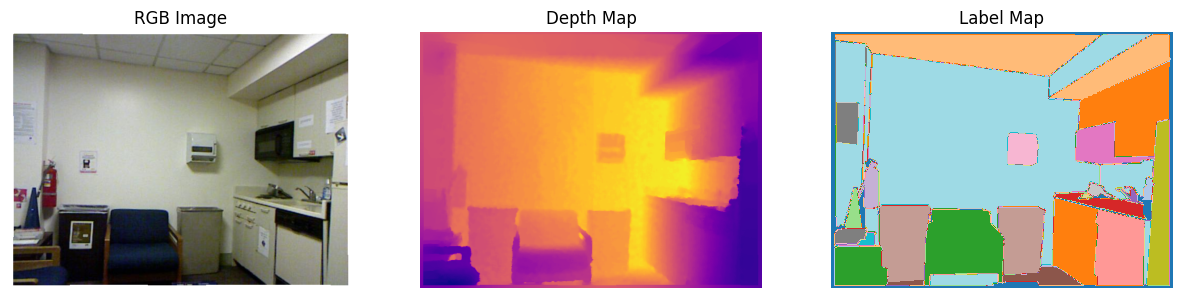

In [ ]:
import matplotlib.pyplot as plt

# Select a sample index
sample_idx = 0  # Change this to visualize different samples

# Extract data
img = images[sample_idx]
depth = depths[sample_idx]
label = labels[sample_idx]

# Plot the image, depth map, and label
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img)
axes[0].set_title("RGB Image")
axes[0].axis("off")

axes[1].imshow(depth, cmap="plasma")
axes[1].set_title("Depth Map")
axes[1].axis("off")

axes[2].imshow(label, cmap="tab20")
axes[2].set_title("Label Map")
axes[2].axis("off")


plt.show()

In [11]:
import cv2

# Function to find bounding boxes with padding
def get_padded_bounding_boxes(label_map, padding=10):
    """Find bounding boxes of unique objects in a label map with padding."""
    unique_labels = np.unique(label_map)
    bounding_boxes = []
    
    height, width = label_map.shape
    
    for label in unique_labels:
        if label == 0:  # Skip background
            continue
        mask = (label_map == label).astype(np.uint8)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)

            # Apply padding while ensuring the box stays within image boundaries
            x1 = max(x - padding, 0)
            y1 = max(y - padding, 0)
            x2 = min(x + w + padding, width)
            y2 = min(y + h + padding, height)

            bounding_boxes.append((label, x1, y1, x2, y2))
    
    return bounding_boxes

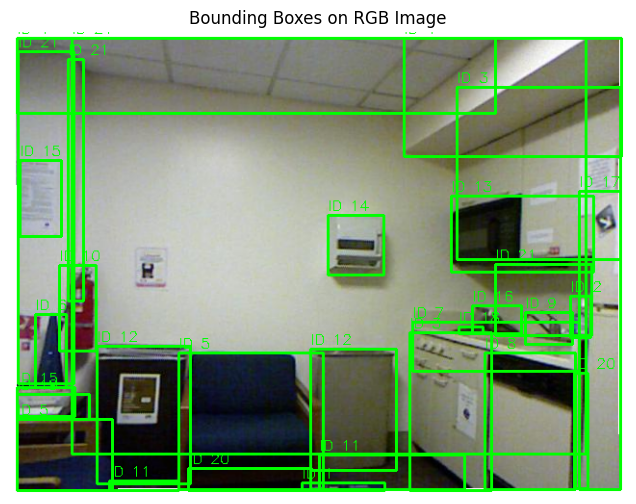

In [ ]:
# Get object bounding boxes
object_bboxes = get_padded_bounding_boxes(label)

# Convert image to OpenCV format (RGB → BGR for OpenCV)
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Draw bounding boxes
for obj_id, x1, y1, x2, y2 in object_bboxes:
    cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
    cv2.putText(img_bgr, f"ID {obj_id}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Convert back to RGB for visualization
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Bounding Boxes on RGB Image")
plt.axis("off")
plt.show()

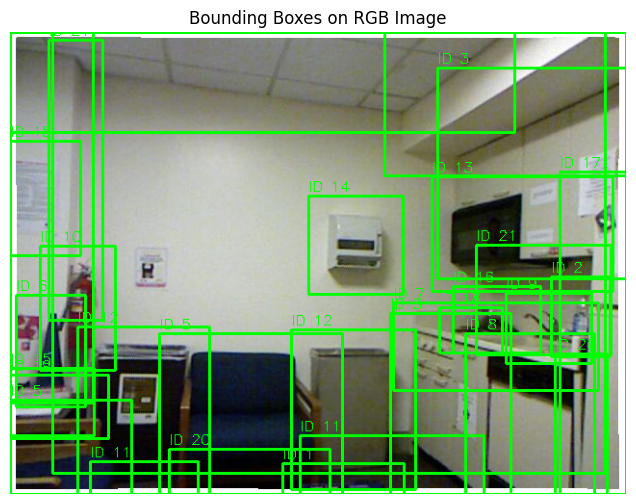

In [13]:
# Get object bounding boxes
object_bboxes = get_padded_bounding_boxes(label, padding=20)

# Convert image to OpenCV format (RGB → BGR for OpenCV)
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Draw bounding boxes
for obj_id, x1, y1, x2, y2 in object_bboxes:
    cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
    cv2.putText(img_bgr, f"ID {obj_id}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Convert back to RGB for visualization
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title("Bounding Boxes on RGB Image")
plt.axis("off")
plt.show()

In [23]:
with open('/media/home/ryjin/depthclip/RangeCLIP/setup/nyu_depth_v2/labels.txt', 'r') as file:
    lines = file.readlines()

lines = [line.strip() for line in lines]
print(lines)

['book', 'bottle', 'cabinet', 'ceiling', 'chair', 'cone', 'counter', 'dishwasher', 'faucet', 'fire extinguisher', 'floor', 'garbage bin', 'microwave', 'paper towel dispenser', 'paper', 'pot', 'refridgerator', 'stove burner', 'table', 'unknown', 'wall', 'bowl', 'magnet', 'sink', 'air vent', 'box', 'door knob', 'door', 'scissor', 'tape dispenser', 'telephone cord', 'telephone', 'track light', 'cork board', 'cup', 'desk', 'laptop', 'air duct', 'basket', 'camera', 'pipe', 'shelves', 'stacked chairs', 'styrofoam object', 'whiteboard', 'computer', 'keyboard', 'ladder', 'monitor', 'stand', 'bar', 'motion camera', 'projector screen', 'speaker', 'bag', 'clock', 'green screen', 'mantel', 'window', 'ball', 'hole puncher', 'light', 'manilla envelope', 'picture', 'mail shelf', 'printer', 'stapler', 'fax machine', 'folder', 'jar', 'magazine', 'ruler', 'cable modem', 'fan', 'file', 'hand sanitizer', 'paper rack', 'vase', 'air conditioner', 'blinds', 'flower', 'plant', 'sofa', 'stereo', 'books', 'exit

object_id
1       657
2       821
3      1710
4       554
5      2174
       ... 
242     113
294      97
331     173
356      85
389      87
Name: count, Length: 70, dtype: int64


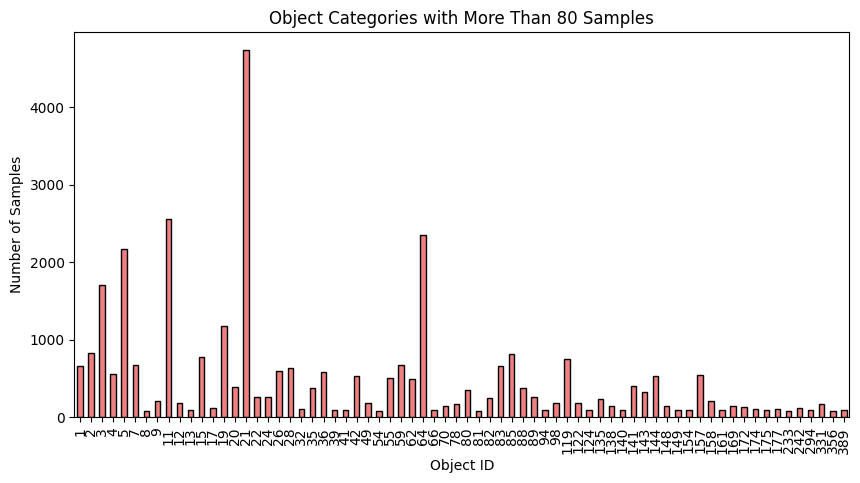

In [5]:
import pandas as pd

# Load metadata
metadata_file = "/media/home/ryjin/depthclip/RangeCLIP/training/nyu_depth_v2/labelled_patches/metadata.csv"
df = pd.read_csv(metadata_file)

# Count occurrences of each object category
category_counts = df["object_id"].value_counts().sort_index()

# Filter categories with more than 80 samples
filtered_categories = category_counts[category_counts > 80]

# Display results
print(filtered_categories)

# Optional: Plot as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
filtered_categories.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.xlabel("Object ID")
plt.ylabel("Number of Samples")
plt.title("Object Categories with More Than 80 Samples")
plt.xticks(rotation=90)
plt.show()

In [6]:
# Compute statistics
mean_samples = filtered_categories.mean()
median_samples = filtered_categories.median()
min_samples = filtered_categories.min()
max_samples = filtered_categories.max()
std_dev_samples = filtered_categories.std()

In [7]:
print(f"Total Unique Categories: {len(category_counts)}")
print(f"Mean Samples per Category: {mean_samples:.2f}")
print(f"Median Samples per Category: {median_samples}")
print(f"Minimum Samples in a Category: {min_samples}")
print(f"Maximum Samples in a Category: {max_samples}")
print(f"Standard Deviation: {std_dev_samples:.2f}")

Total Unique Categories: 894
Mean Samples per Category: 475.03
Median Samples per Category: 205.0
Minimum Samples in a Category: 81
Maximum Samples in a Category: 4730
Standard Deviation: 725.71


In [1]:
import pandas as pd

# Load metadata
metadata_file = "/media/home/ryjin/depthclip/RangeCLIP/training/nyu_depth_v2/labelled_patches/metadata.csv"
df = pd.read_csv(metadata_file)

print(df['object_id'].min())
print(df['object_id'].max())

1
894


In [14]:
import pandas as pd
import torch
from transformers import CLIPTokenizer, CLIPModel
import numpy as np
from tqdm import tqdm

# Load labels
df = pd.read_csv("/media/home/ryjin/depthclip/RangeCLIP/data/sunrgbd/SUNRGBD/candidate_labels.csv", na_values=[], keep_default_na=False)  # Update path if needed
labels = df['label'].astype(str).tolist()

In [15]:
labels = ['a depth map of nothing'] + ['a depth map of ' + label for label in labels]

In [16]:
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").eval().cuda()

In [17]:

# Encode labels
with torch.no_grad():
    inputs = tokenizer(labels, padding=True, truncation=True, return_tensors="pt").to("cuda")
    text_features = model.get_text_features(**inputs)
    text_features = torch.nn.functional.normalize(text_features, p=2, dim=1)


In [19]:
import torch.nn.functional as F

def get_cosine_similarity(text_features, labels, index1, index2):
    """
    Compute cosine similarity between two vectors.
    """
    cos_sim = F.cosine_similarity(text_features[index1].unsqueeze(0), text_features[index2].unsqueeze(0)).item()
    print(f"Similarity ({index1}: {labels[index1]} vs. {index2}: {labels[index2]}): {cos_sim:.4f}")

get_cosine_similarity(text_features, labels, 40, 41)
get_cosine_similarity(text_features, labels, 40, 42)
get_cosine_similarity(text_features, labels, 40, 43)
get_cosine_similarity(text_features, labels, 40, 803)
get_cosine_similarity(text_features, labels, 40, 909)
get_cosine_similarity(text_features, labels, 40, 1951)
get_cosine_similarity(text_features, labels, 40, 1933)

get_cosine_similarity(text_features, labels, 1, 2)
get_cosine_similarity(text_features, labels, 1, 4)
get_cosine_similarity(text_features, labels, 1, 7)
get_cosine_similarity(text_features, labels, 1, 3)
get_cosine_similarity(text_features, labels, 1, 5)
get_cosine_similarity(text_features, labels, 1, 1951)
get_cosine_similarity(text_features, labels, 1, 1933)

# print(f"Similarity (40 vs 41 or {labels[40]} vs. {labels[41]}): {get_cosine_similarity(text_features[40], text_features[41]):.4f}")
# print(f"Similarity (40 vs 42): {get_cosine_similarity(text_features[40], text_features[42]):.4f}")
# print(f"Similarity (40 vs 43): {get_cosine_similarity(text_features[40], text_features[43]):.4f}")
# print(f"Similarity (40 vs 803): {get_cosine_similarity(text_features[40], text_features[803]):.4f}")
# print(f"Similarity (40 vs 41): {get_cosine_similarity(text_features[40], text_features[909]):.4f}")
# print(f"Similarity (40 vs 41): {get_cosine_similarity(text_features[40], text_features[1951]):.4f}")
# print(f"Similarity (40 vs 41): {get_cosine_similarity(text_features[40], text_features[1933]):.4f}")


Similarity (40: a depth map of air conditioner vs. 41: a depth map of air conditioner system): 0.9709
Similarity (40: a depth map of air conditioner vs. 42: a depth map of air conditioner/heater): 0.9715
Similarity (40: a depth map of air conditioner vs. 43: a depth map of air conditioning): 0.9694
Similarity (40: a depth map of air conditioner vs. 803: a depth map of centralised air cooler): 0.9185
Similarity (40: a depth map of air conditioner vs. 909: a depth map of cieling fan): 0.8447
Similarity (40: a depth map of air conditioner vs. 1951: a depth map of fan): 0.8394
Similarity (40: a depth map of air conditioner vs. 1933: a depth map of eyeball plastic ball): 0.7537
Similarity (1: a depth map of CD vs. 2: a depth map of plant): 0.8472
Similarity (1: a depth map of CD vs. 4: a depth map of abelchair): 0.8045
Similarity (1: a depth map of CD vs. 7: a depth map of abstract painting): 0.8264
Similarity (1: a depth map of CD vs. 3: a depth map of abat): 0.8755
Similarity (1: a depth 

In [20]:

get_cosine_similarity(text_features, labels, 12, 5796)
get_cosine_similarity(text_features, labels, 12, 5797)
get_cosine_similarity(text_features, labels, 12, 11)
get_cosine_similarity(text_features, labels, 12, 2639)

Similarity (12: a depth map of ac ventilator vs. 5796: a depth map of ventilator): 0.9619
Similarity (12: a depth map of ac ventilator vs. 5797: a depth map of ventileter): 0.8177
Similarity (12: a depth map of ac ventilator vs. 11: a depth map of ac vent): 0.8795
Similarity (12: a depth map of ac ventilator vs. 2639: a depth map of hvac unit): 0.8492


In [21]:
import os
import numpy as np
from PIL import Image
from collections import Counter
import pandas as pd
from tqdm import tqdm

# Load candidate labels
df = pd.read_csv("/media/home/ryjin/depthclip/RangeCLIP/data/sunrgbd/SUNRGBD/candidate_labels.csv", na_values=[], keep_default_na=False)
df = df.sort_values(by="index", ascending=True).reset_index(drop=True)
label_list = df['label'].tolist()

# Path to segmentation label images
label_dir = "/media/home/ryjin/depthclip/RangeCLIP/data/sunrgbd/SUNRGBD/labels"
label_counts = Counter()

# Loop through all PNG label maps
for filename in tqdm(os.listdir(label_dir)):
    if filename.endswith(".png"):
        path = os.path.join(label_dir, filename)
        img = Image.open(path)
        label_array = np.array(img)

        # Flatten and count label indices
        label_counts.update(label_array.flatten())

# Convert counts to a sorted list of (label index, frequency)
sorted_counts = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

# Print results with label strings
print(f"{'Label Index':>12} | {'Frequency':>10} | Label")
print("-" * 50)
for idx, freq in sorted_counts:
    if idx < len(label_list):
        label_str = label_list[idx]
    else:
        label_str = "<unknown>"
    print(f"{idx:>12} | {freq:>10} | {label_str}")


100%|██████████| 10335/10335 [02:49<00:00, 60.96it/s]

 Label Index |  Frequency | Label
--------------------------------------------------
        5847 |  648379754 | wall beam
        2121 |  577580218 | floor access panel
         172 |  287218852 | background object
         820 |  277959821 | chair gallery
        5239 |  196838963 | table backround board
         304 |   87632161 | bed canopy
        4885 |   75132470 | sofa bed
        1422 |   72754888 | desk and wall
        6120 |   72199383 | window ac
         622 |   67613671 | cabinet price tag
        1559 |   64240334 | door window reflection
        4682 |   29157153 | shelf compartments
        1320 |   27076843 | curtain dividing wall
         785 |   25993330 | ceiling beam
        1232 |   21507604 | counter reflection
         718 |   21203869 | carpet area
         467 |   17710508 | bookshelve
        3843 |   17132767 | picture board
        1304 |   16901129 | cupboard draw
         521 |   16302144 | box fan
        6098 |   15966726 | whiteboard cleaner
        